<a href="https://colab.research.google.com/github/pavelpryadokhin/Data-Scientist/blob/main/Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Визуализация данных


Давайте рассмотрим и проанализируем разнообразные данные, чтобы выявить существующие взаимосвязи.

##Данные о видеоиграх

Каждое наблюдение содержит 10 характеристик:

| Характеристика  | Описание                                                       |
|-----------------|---------------------------------------------------------------|
| **Name**        | Название игры                                                 |
| **Platform**    | Игровая платформа (PC, PSP, X360 и др.)                     |
| **Year**        | Год выпуска игры                                             |
| **Genre**       | Жанр игры                                                    |
| **Publisher**   | Издатель игры                                                |
| **NA_Sales**    | Продажи в Северной Америке (в миллионах)                    |
| **EU_Sales**    | Продажи в Европе (в миллионах)                              |
| **JP_Sales**    | Продажи в Японии (в миллионах)                              |
| **Other_Sales** | Продажи в остальных странах мира (в миллионах)              |
| **Global_Sales**| Объем продаж по всему миру                                   |

In [ ]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
df = pd.read_csv("./vgsale_1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [ ]:
df.index = range(len(df))
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
genres_before=df[df['Year'] < 2000].groupby('Genre').agg(Count=('Name','count'), Sales=('Global_Sales','sum')).sort_values(ascending=False,by=['Count'])
genres_before = genres_before.reset_index()
genres_before.columns = ['Genre', 'Count', 'Sales']

genres_after =df[df['Year'] >= 2000].groupby('Genre').agg(Count=('Name','count'), Sales=('Global_Sales','sum')).sort_values(ascending=False,by=['Count'])
genres_after = genres_after.reset_index()
genres_after.columns = ['Genre', 'Count', 'Sales']

genres_before

,Genre,Count,Sales
0,Sports,327,178.85
1,Action,228,190.47
2,Fighting,197,130.69
3,Racing,191,162.50
4,Role-Playing,181,199.77
5,Shooter,167,128.74
6,Platform,158,331.18
7,Misc,124,71.99
8,Strategy,123,57.43
9,Adventure,99,49.59


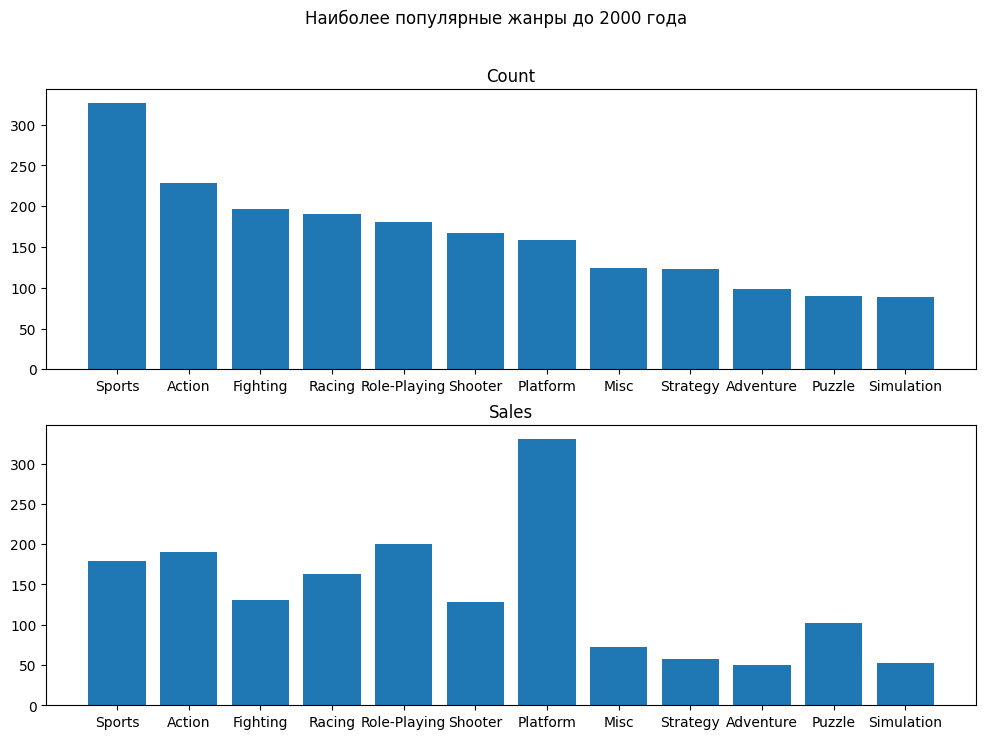

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.bar('Genre', 'Count', data=genres_before)
ax1.set_title("Count")
ax2.bar('Genre', 'Sales', data=genres_before)
ax2.set_title("Sales")
fig.suptitle('Наиболее популярные жанры до 2000 года')
plt.show()

До 2000: если рассматривать количество игр то популярен жанр спорт, если рассматриавть количество продаж, то жанр Платформ



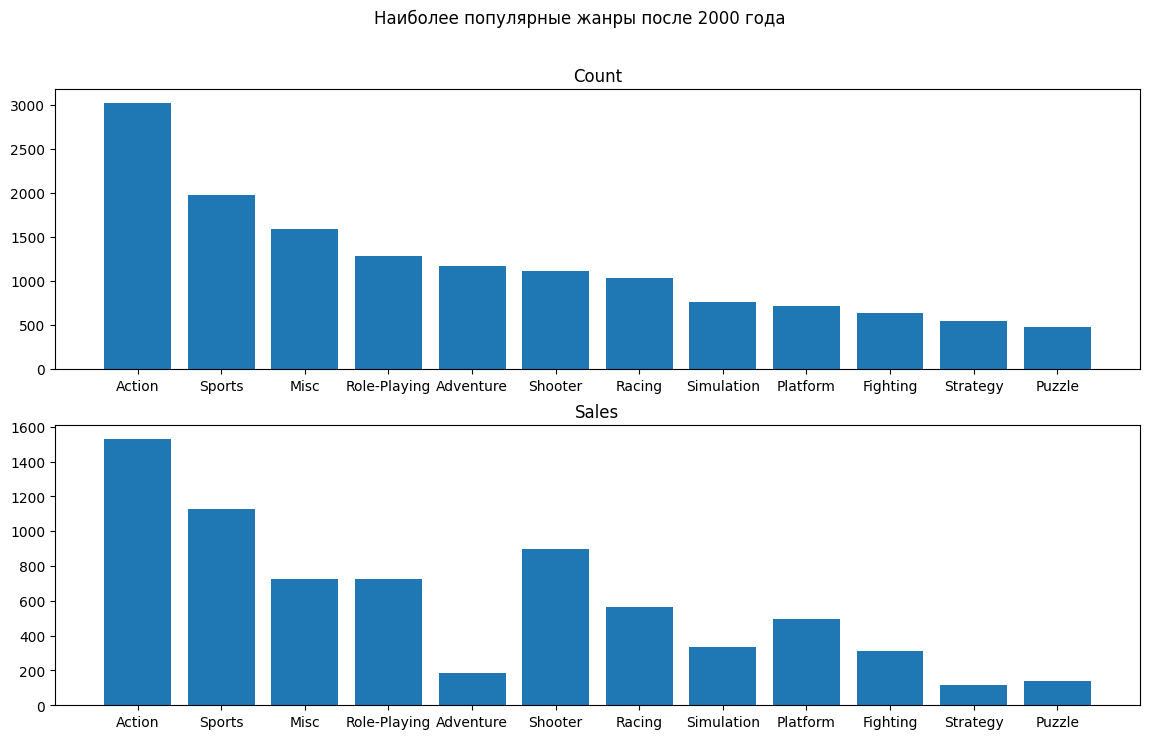

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
ax1.bar('Genre', 'Count', data=genres_after)
ax1.set_title("Count")
ax2.bar('Genre', 'Sales', data=genres_after)
ax2.set_title("Sales")
fig.suptitle('Наиболее популярные жанры после 2000 года')
plt.show()

после 2000: если рассматривать количество игр и количество продаж, то популярен жанр Экшен

In [ ]:
game_count= df['Year'].value_counts().sort_index()
game_count.head()

Year
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: count, dtype: int64

Text(0, 0.5, 'Общее число видеоигр')

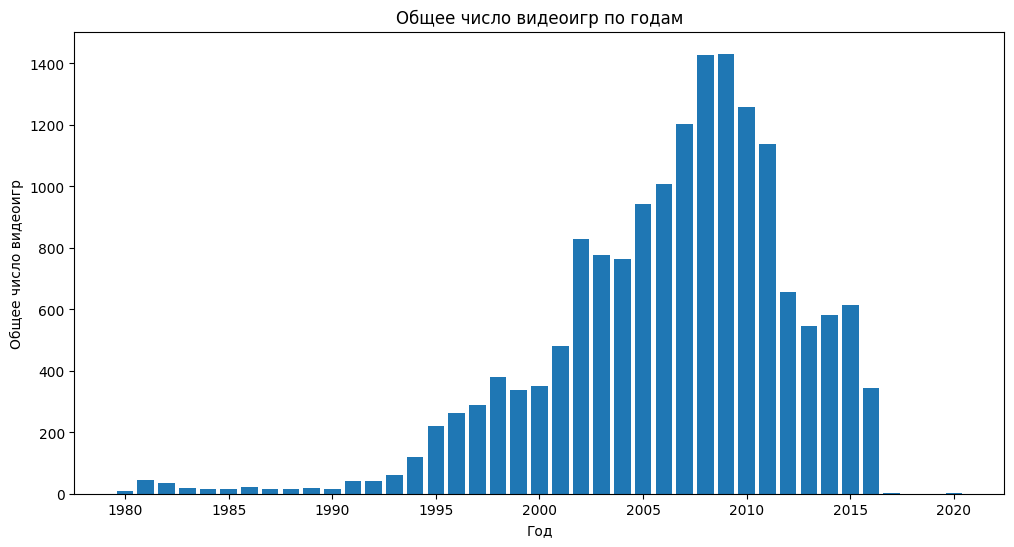

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(game_count.index, game_count.values)
plt.title('Общее число видеоигр по годам')
plt.xlabel('Год')
plt.ylabel('Общее число видеоигр')

Видем, что пик видеоигр пришелся на 2008-2010 года

In [ ]:
author= df['Publisher'].value_counts().nlargest(3)
top = df[df['Publisher'].isin(author.index)]
top.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


<Figure size 800x600 with 0 Axes>

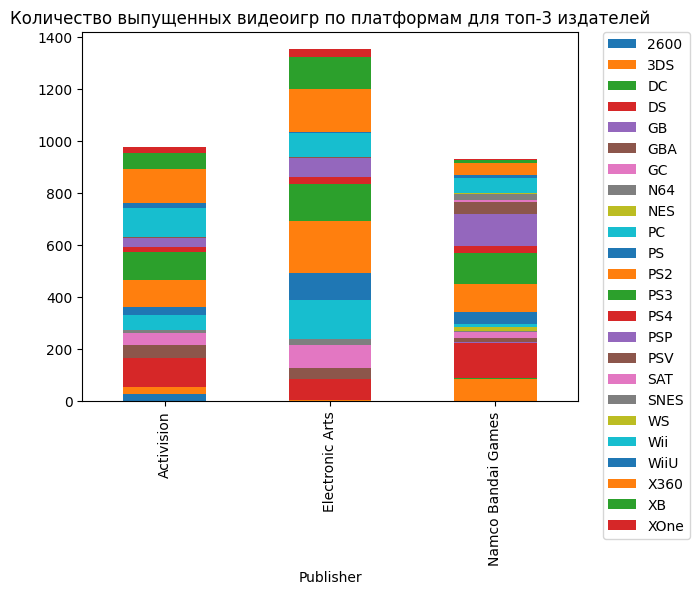

In [ ]:
plt.figure(figsize=(8, 6))
top.pivot_table(index='Publisher', columns='Platform', values='Name', aggfunc='count').plot(kind='bar', stacked=True)
plt.title('Количество выпущенных видеоигр по платформам для топ-3 издателей')
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

In [ ]:
sales_1 = df[(df['Year'] >= 1980) & (df['Year'] < 2000)]
sales_2 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

res_1=sales_1[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
res_2=sales_2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

res_1

NA_Sales       811.77
EU_Sales       314.07
JP_Sales       474.82
Other_Sales     54.55
dtype: float64

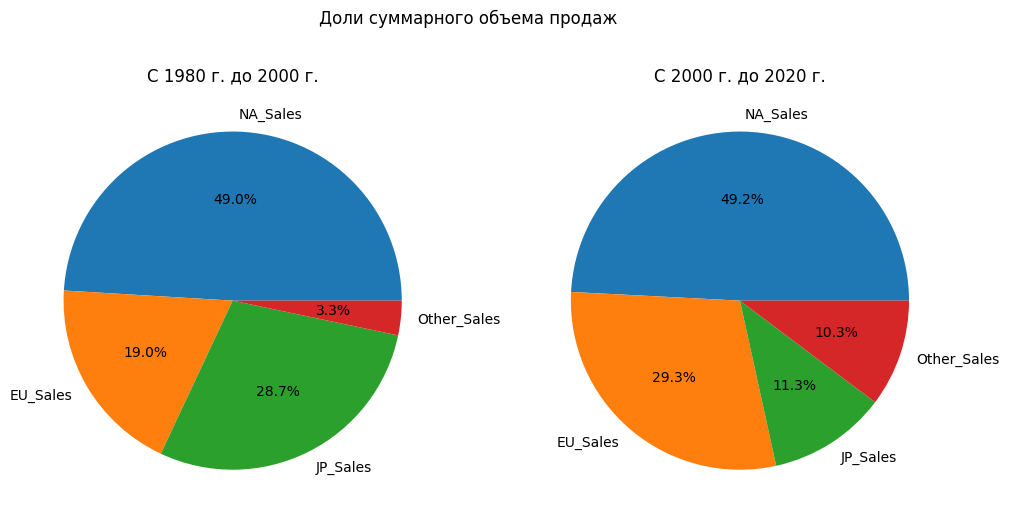

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(res_1, labels=res_1.index, autopct='%1.1f%%')
ax2.pie(res_2, labels=res_2.index, autopct='%1.1f%%')

ax1.set_title("C 1980 г. до 2000 г.")
ax2.set_title("C 2000 г. до 2020 г.")
fig.suptitle('Доли суммарного объема продаж ')
plt.show()

## Данные о среднем значении IQ по странам мира


Каждое наблюдение содержит следующие характеристики:

| Характеристика                | Описание                                                        |
|-------------------------------|-----------------------------------------------------------------|
| **Rank**                      | Место в рейтинге                                               |
| **Country**                   | Название страны                                               |
| **Average IQ**                | Средний показатель IQ                                         |
| **Continent**                 | Название континента                                          |
| **Literacy Rate**             | Коэффициент грамотности                                       |
| **Nobel Prices**              | Количество нобелевских премий                                 |
| **Human Development Index**    | Индекс человеческого развития                                  |
| **Mean years of schooling**    | Среднее количество лет обучения                                 |
| **Gross National Income**      | Показатель “валовой национальный доход”                        |
| **Population**                | Численность населения                                         |

In [ ]:
df = pd.read_csv("./IQ_countries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     193 non-null    object 
 1   Country                  192 non-null    object 
 2   Average IQ               192 non-null    float64
 3   Continent                192 non-null    object 
 4   Literacy Rate            192 non-null    float64
 5   Nobel Prices             192 non-null    float64
 6   Human Development Index  178 non-null    float64
 7   Mean years of schooling  178 non-null    float64
 8   Gross National Income    178 non-null    float64
 9   Population               192 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.2+ KB


In [ ]:
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
0,1,Japan,106.48,Asia,0.99,29.0,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4.0,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0.0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1.0,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8.0,0.768,7.6,17504.0,1425671352


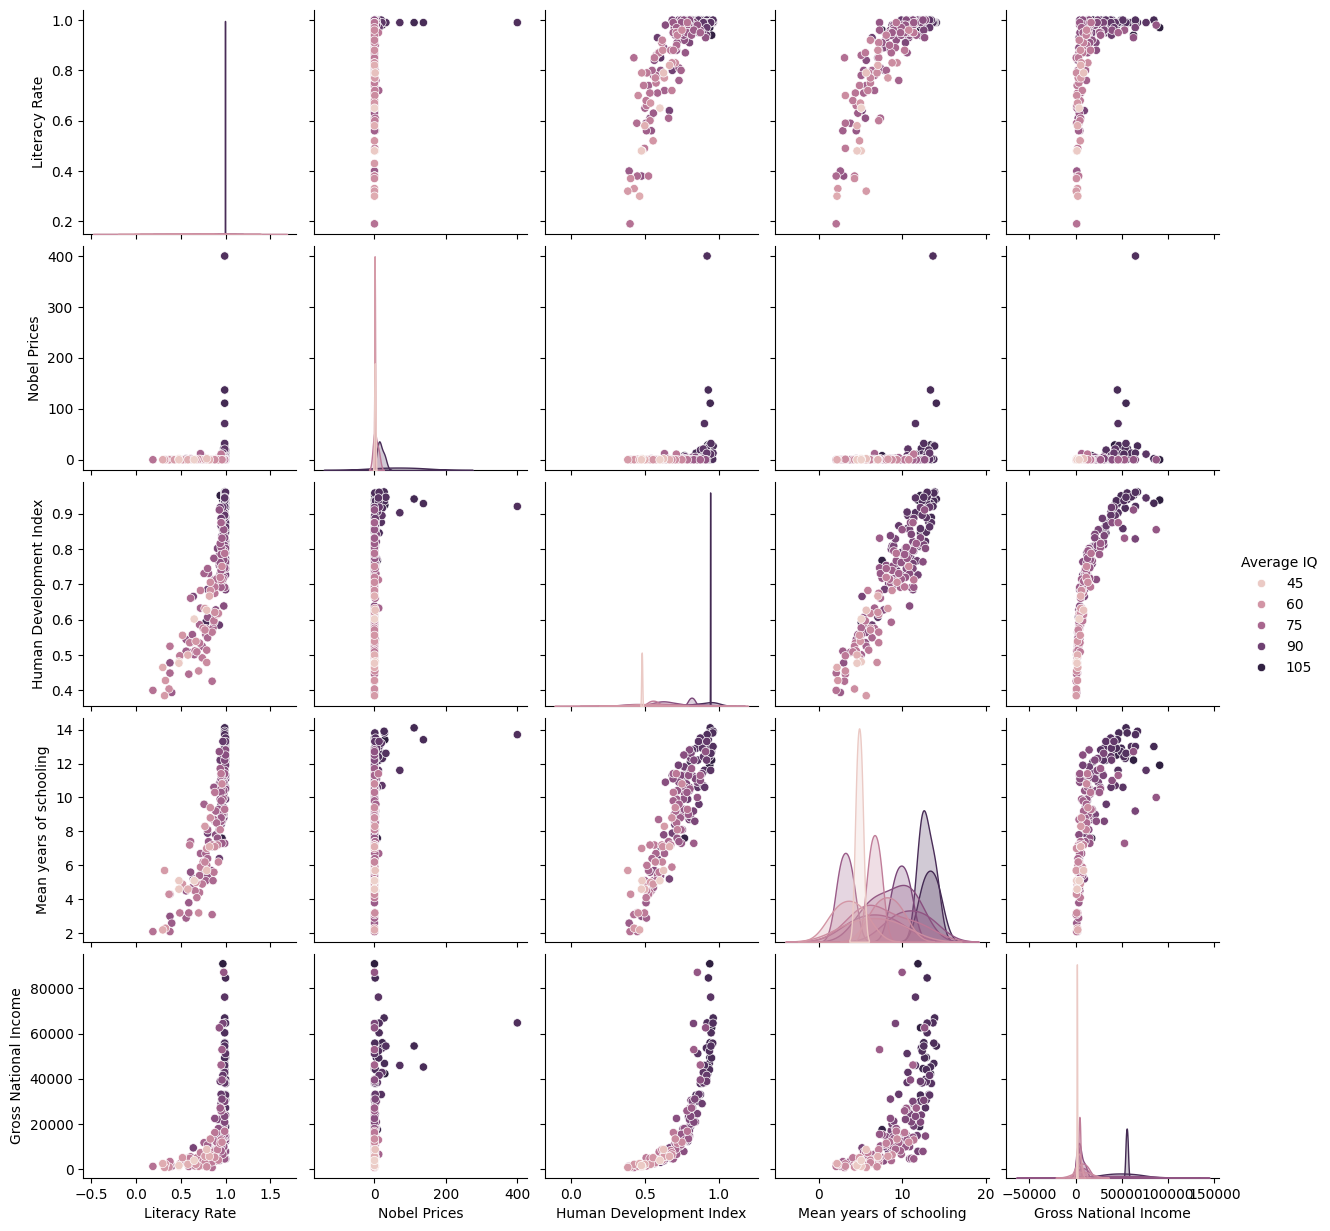

In [ ]:
sns.pairplot(df, hue='Average IQ')

Рассмотрим необычные взаимосвязи:

1.   Количество нобелевских премий больше всего при среднем "валовый национальный показатель", а не высоком, как по логике должно быть.
2.   Хотя зависимость между "валовый национальный показатель"  и количеством лет в школе прямая, есть множество выбросов, где высокий валовый показатель и при этом среднее количество лет в школе небольшое



## Данные о покупках покупателей в разных штатах США


Каждое наблюдение содержит следующие характеристики:

| Характеристика                | Описание                                                        |
|-------------------------------|-----------------------------------------------------------------|
| **Customer ID**               | Порядковый номер строки в таблице                               |
| **Age**                       | Возраст покупателя                                              |
| **Gender**                    | Пол покупателя                                                 |
| **Item Purchased**            | Приобретенный товар                                            |
| **Category**                  | Категория                                                      |
| **Purchase Amount (USD)**     | Сумма покупки (в долларах)                                   |
| **Location**                  | Локация покупки                                               |
| **Size**                      | Размер (одежды)                                               |
| **Color**                     | Цвет                                                          |
| **Season**                    | Время года совершения покупки                                   |
| **Review Rating**             | Полученный в отзыве рейтинг                                   |
| **Subscription Status**       | Статус подписки покупателя                                     |
| **Shipping Type**             | Тип доставки                                                  |
| **Discount Applied**          | Применена ли скидка                                           |
| **Promo Code Used**           | Применен ли промокод                                          |
| **Previous Purchases**        | Были ли у данного покупателя предыдущие покупки                |
| **Payment Method**            | Способ оплаты                                                 |
| **Frequency of Purchases**    | Частота покупок                                               |

In [ ]:
df = pd.read_csv("./shopping_habits.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.iloc[:,1:].head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
def foo(df):
  vec=df.drop_duplicates()
  vec.index=range(len(vec))
  print(vec.to_dict())
  vec={v:k for k, v in vec.to_dict().items()}
  return vec
vec=dict()
for val in df.iloc[:20,1:]:
  if val not in ['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']:
    vec.update(foo(df[val]))
print(vec)

{0: 'Male', 1: 'Female'}
{0: 'Blouse', 1: 'Sweater', 2: 'Jeans', 3: 'Sandals', 4: 'Sneakers', 5: 'Shirt', 6: 'Shorts', 7: 'Coat', 8: 'Handbag', 9: 'Shoes', 10: 'Dress', 11: 'Skirt', 12: 'Sunglasses', 13: 'Pants', 14: 'Jacket', 15: 'Hoodie', 16: 'Jewelry', 17: 'T-shirt', 18: 'Scarf', 19: 'Hat', 20: 'Socks', 21: 'Backpack', 22: 'Belt', 23: 'Boots', 24: 'Gloves'}
{0: 'Clothing', 1: 'Footwear', 2: 'Outerwear', 3: 'Accessories'}
{0: 'Kentucky', 1: 'Maine', 2: 'Massachusetts', 3: 'Rhode Island', 4: 'Oregon', 5: 'Wyoming', 6: 'Montana', 7: 'Louisiana', 8: 'West Virginia', 9: 'Missouri', 10: 'Arkansas', 11: 'Hawaii', 12: 'Delaware', 13: 'New Hampshire', 14: 'New York', 15: 'Alabama', 16: 'Mississippi', 17: 'North Carolina', 18: 'California', 19: 'Oklahoma', 20: 'Florida', 21: 'Texas', 22: 'Nevada', 23: 'Kansas', 24: 'Colorado', 25: 'North Dakota', 26: 'Illinois', 27: 'Indiana', 28: 'Arizona', 29: 'Alaska', 30: 'Tennessee', 31: 'Ohio', 32: 'New Jersey', 33: 'Maryland', 34: 'Vermont', 35: 'New M

In [ ]:
df.replace(vec,inplace=True)
df.iloc[:,1:].head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,0,0,0,53,0,0,0,0,3.1,0,0,0,0,14,0,0
1,19,0,1,0,64,1,0,1,0,3.1,0,0,0,0,2,1,0
2,50,0,2,0,73,2,1,1,1,3.1,0,1,0,0,23,2,1
3,21,0,3,1,90,3,2,1,1,3.5,0,2,0,0,49,3,1
4,45,0,0,0,49,4,2,2,1,2.7,0,1,0,0,31,3,2


In [ ]:
sns.pairplot(df.iloc[:200,1:], hue='Age')

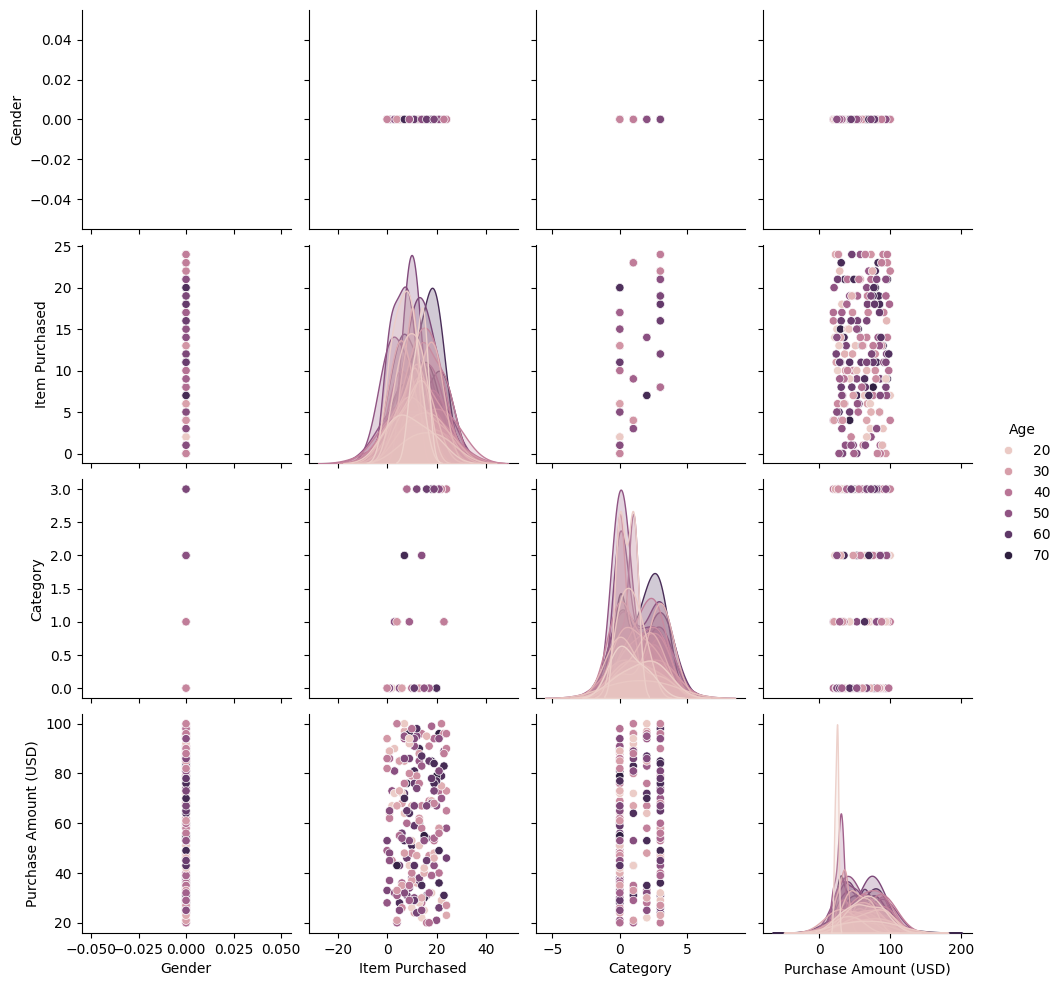

In [ ]:
sns.pairplot(df.iloc[:200,1:6], hue='Age')

In [ ]:
sns.pairplot(df.iloc[:200,1:], hue='Location')

In [ ]:
Проанализировав таблицы, можно сказать что распределенеие всех значений удовлетвояет нормальному закону распределения.